In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.read_csv('Individual or Pair Sports (Equipment-based).csv')

In [7]:
df1.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category
0,107,Lars Thorlaksn Aas,M,33.0,180.0,75.0,Norway,NOR,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",Individual or Pair Sports (Equipment-based)
1,108,Lars Thorlaksn Aas,M,33.0,180.0,75.0,Norway,NOR,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Individual",Individual or Pair Sports (Equipment-based)
2,109,Lars Thorlaksn Aas,M,33.0,180.0,75.0,Norway,NOR,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Team",Individual or Pair Sports (Equipment-based)
3,124,Hakon Aasns,M,41.0,180.0,75.0,Norway,NOR,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",Individual or Pair Sports (Equipment-based)
4,125,Hans Aasns,M,33.0,194.0,93.0,Norway,NOR,1936,Summer,Berlin,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Individual or Pair Sports (Equipment-based)


In [8]:
df1.drop(columns ='Unnamed: 0',axis =1,inplace = True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22430 entries, 0 to 22429
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      22430 non-null  object 
 1   Sex       22430 non-null  object 
 2   Age       22430 non-null  float64
 3   Height    22430 non-null  float64
 4   Weight    22430 non-null  float64
 5   Team      22430 non-null  object 
 6   NOC       22430 non-null  object 
 7   Year      22430 non-null  int64  
 8   Season    22430 non-null  object 
 9   City      22430 non-null  object 
 10  Sport     22430 non-null  object 
 11  Event     22430 non-null  object 
 12  category  22430 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.2+ MB


In [10]:
df1.corr(numeric_only = True)

,Age,Height,Weight,Year
Age,1.000000,0.031082,0.173810,-0.187529
Height,0.031082,1.000000,0.654410,-0.241250
Weight,0.173810,0.654410,1.000000,-0.102474
Year,-0.187529,-0.241250,-0.102474,1.000000


<Axes: >

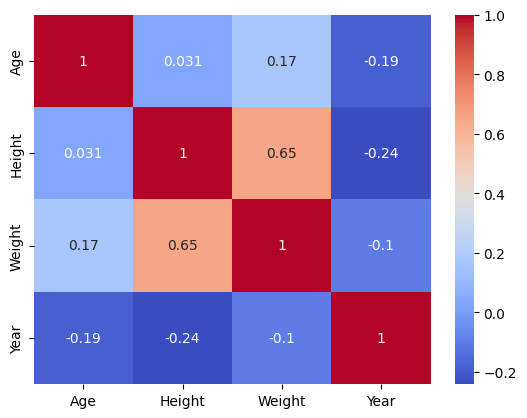

In [11]:
sns.heatmap(df1.corr(numeric_only = True),cmap = 'coolwarm',annot= True)

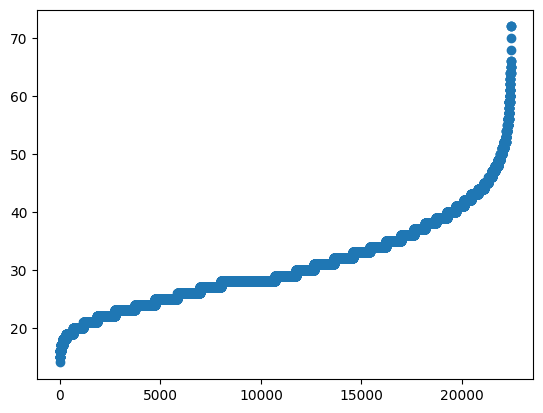

In [12]:
d = df1.sort_values(by = 'Age')
plt.scatter(range(len(d)),'Age',data = d)


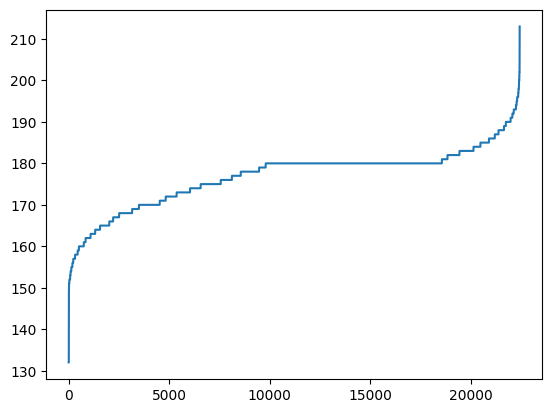

In [13]:
d = df1.sort_values(by = 'Height')
plt.plot(range(len(d)),'Height',data = d)

In [14]:
df1.describe()

,Age,Height,Weight,Year
count,22430.000000,22430.000000,22430.000000,22430.000000
mean,30.824432,176.888720,73.611993,1964.168435
std,7.790615,7.267953,9.476207,35.324575
min,14.000000,132.000000,40.000000,1896.000000
25%,25.000000,173.000000,70.000000,1928.000000
50%,29.000000,180.000000,75.000000,1968.000000
75%,35.000000,180.000000,75.000000,1996.000000
max,72.000000,213.000000,140.000000,2016.000000


# i have check the skewness and correlation,check the oulier in the data.i have see some oulier in the data.so i have remove the oulier in the data

In [15]:
q1 = np.percentile(df1['Age'],25)
q3 = np.percentile(df1['Age'],75)
iqr = q3 - q1
upper_limit_age = q3 + 1.5*iqr
lower_limit_age = q1 - 1.5*iqr
print('upper ',upper_limit_age)
print('lower',lower_limit_age)

upper  50.0
lower 10.0


In [16]:
q1 = np.percentile(df1['Height'],25)
q3 = np.percentile(df1['Height'],75)
iqr = q3 - q1
upper_limit_hg = q3 + 1.5*iqr
lower_limit_hg = q1 - 1.5*iqr
print('upper ',upper_limit_hg)
print('lower',lower_limit_hg)

upper  190.5
lower 162.5


In [17]:
q1 = np.percentile(df1['Weight'],25)
q3 = np.percentile(df1['Weight'],75)
iqr = q3 - q1
upper_limit_wg = q3 + 1.5*iqr
lower_limit_wg = q1 - 1.5*iqr
print('upper ',upper_limit_wg)
print('lower',lower_limit_wg)

upper  82.5
lower 62.5


In [18]:
q1 = np.percentile(df1['Year'],25)
q3 = np.percentile(df1['Year'],75)
iqr = q3 - q1
upper_limit_yr = q3 + 1.5*iqr
lower_limit_yr = q1 - 1.5*iqr
print('upper ',upper_limit_yr)
print('lower',lower_limit_yr)

upper  2098.0
lower 1826.0


In [19]:
# this new data base create.i have remove all outlier in this dataset
df = df1[(df1['Age'] > lower_limit_age) & (df1['Age'] < upper_limit_age) & (df1['Height'] > lower_limit_hg) & (df1['Height'] < upper_limit_hg) & (df1['Year'] > lower_limit_yr) & (df1['Weight'] > lower_limit_wg) & (df1['Weight'] < upper_limit_wg)] 


In [20]:
df.describe()

,Age,Height,Weight,Year
count,16262.000000,16262.000000,16262.000000,16262.000000
mean,30.552023,178.029701,73.929314,1955.712581
std,6.935742,4.745686,4.011441,35.247208
min,15.000000,163.000000,63.000000,1896.000000
25%,26.000000,175.000000,73.000000,1920.000000
50%,29.000000,180.000000,75.000000,1960.000000
75%,35.000000,180.000000,75.000000,1988.000000
max,49.000000,190.000000,82.000000,2016.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\3983742443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\3983742443.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

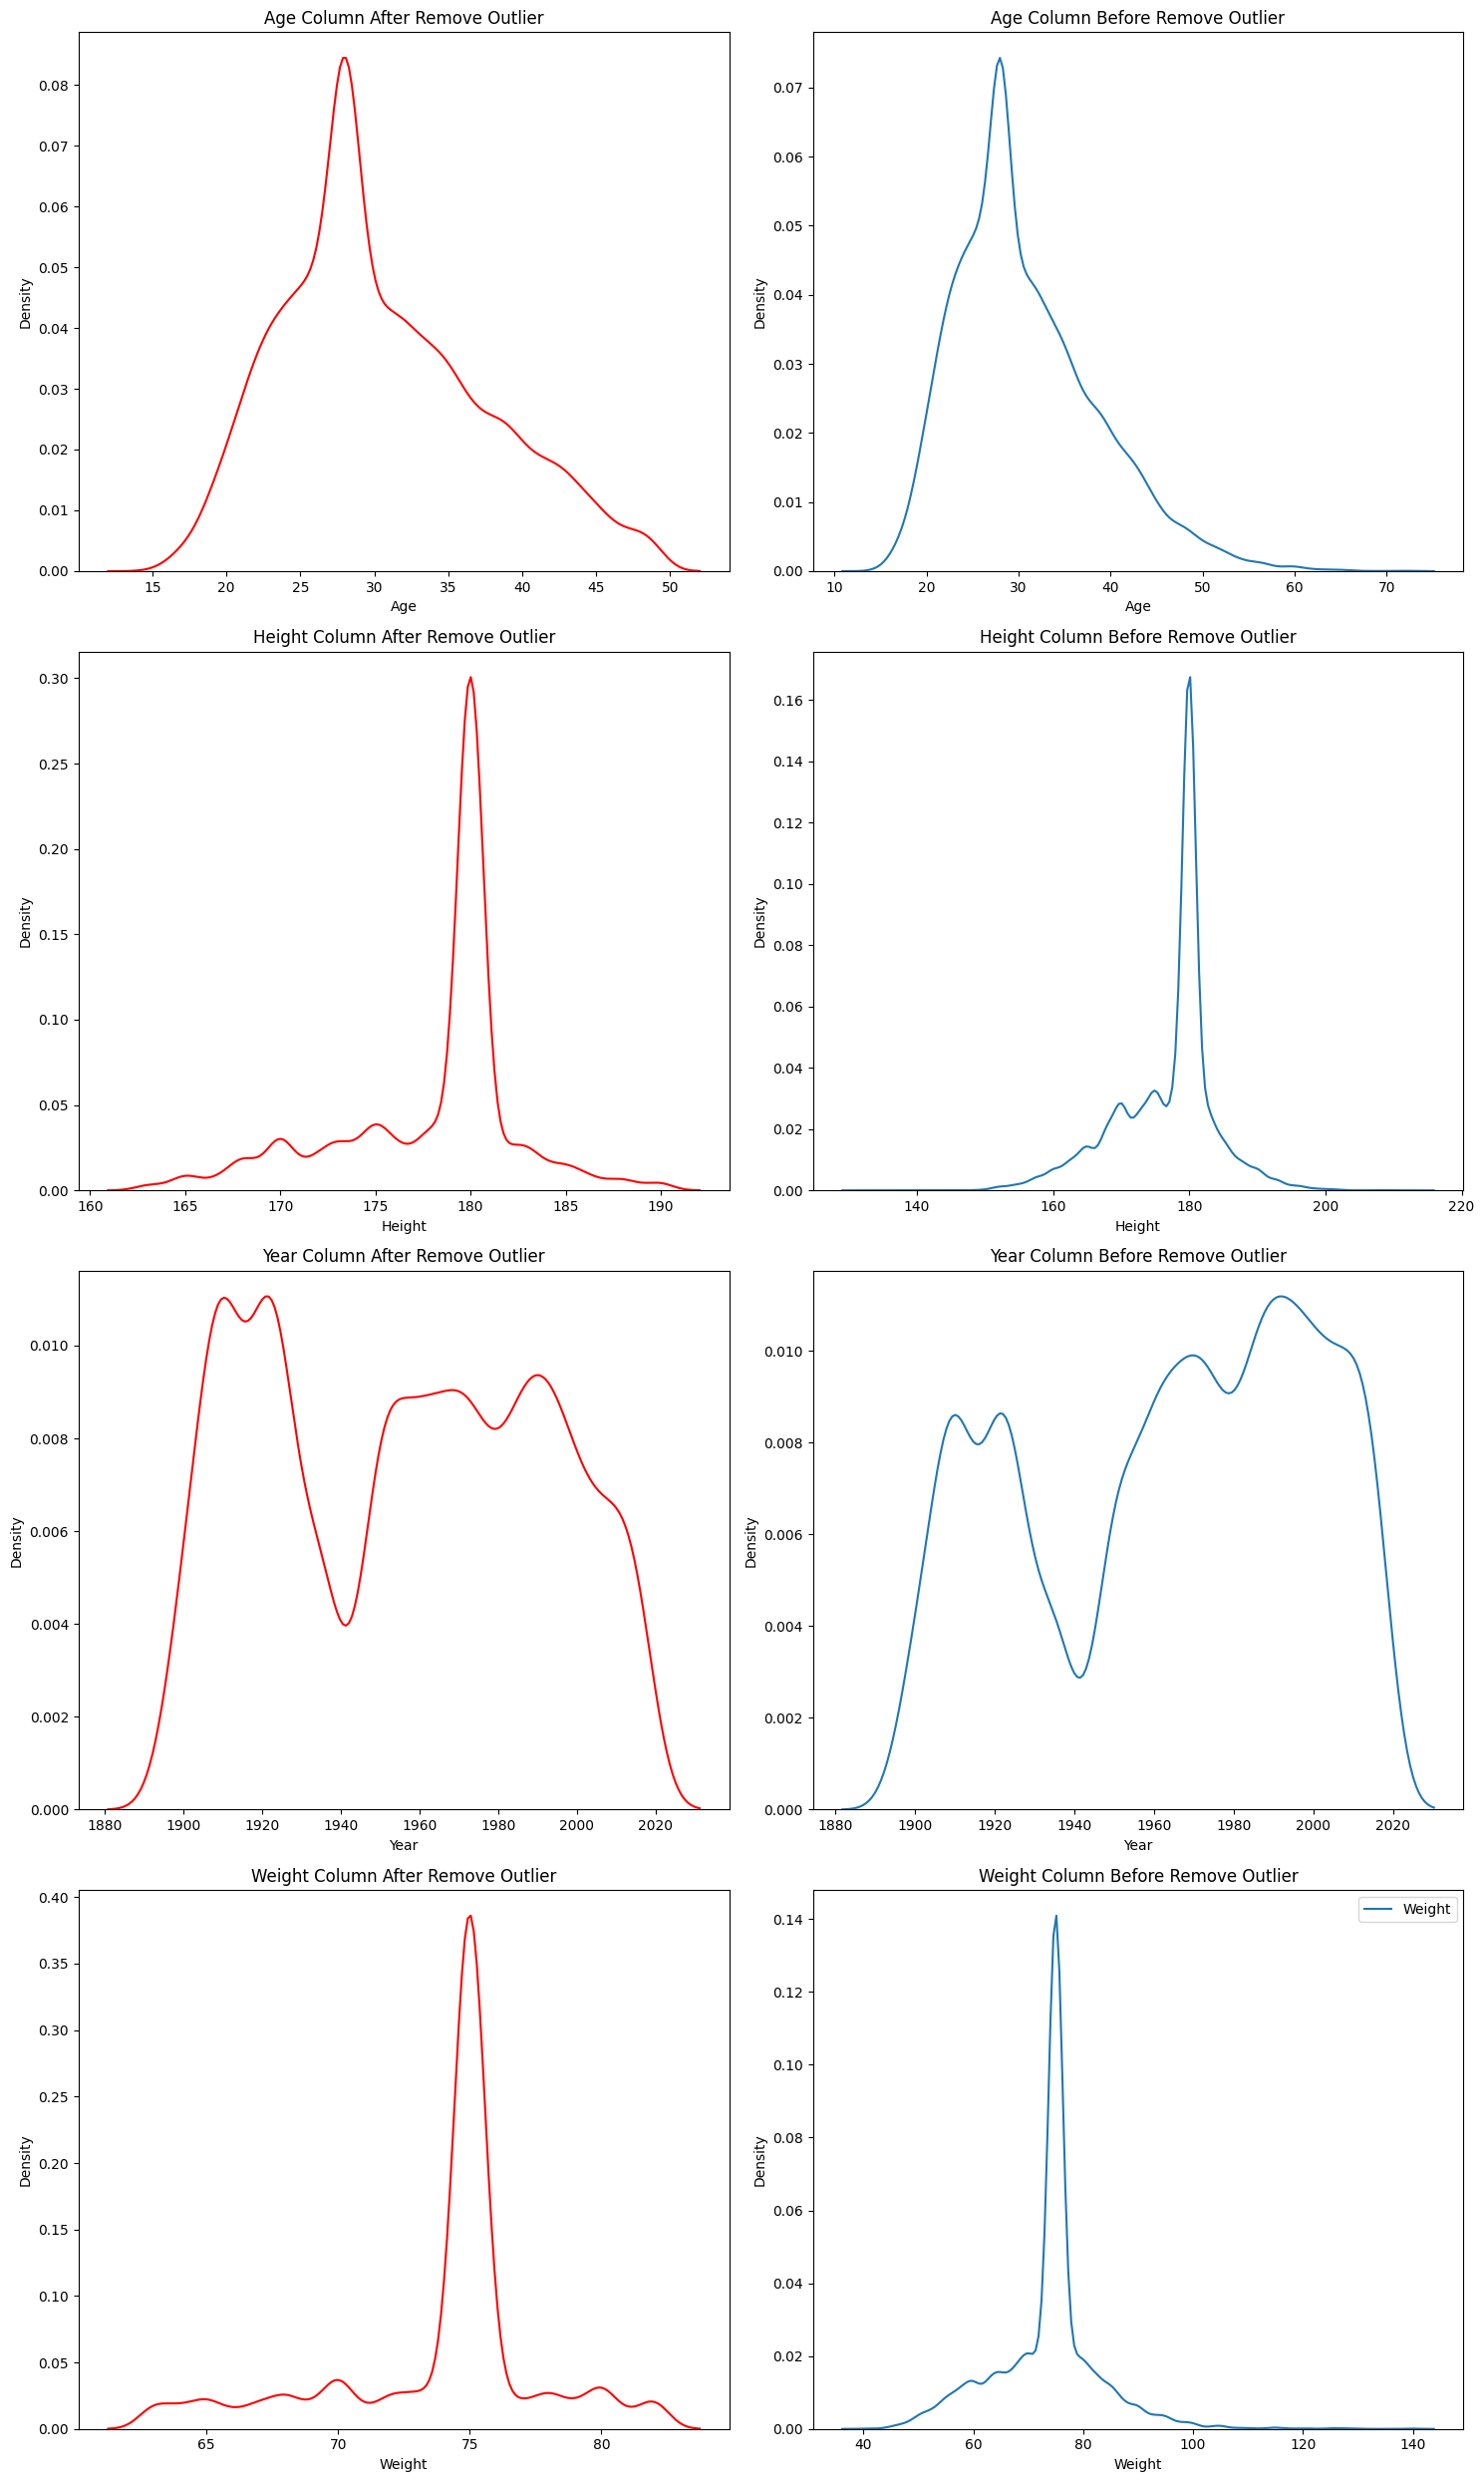

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.distplot(df1['Age'], hist=False, label='Age', ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.distplot(df['Height'], hist=False, label='Height', ax=axes[1, 0],color = 'red')
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.distplot(df1['Height'], hist=False, label='Height', ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.distplot(df['Year'], hist=False, label='Year', ax=axes[2, 0],color = 'red')
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.distplot(df1['Year'], hist=False, label='year', ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.distplot(df['Weight'], hist=False, label='weight',color = 'red', ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.distplot(df1['Weight'], hist=False, label='Weight', ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()


In [22]:
y1 = df['Year'].skew()
h1 = df['Height'].skew()
w1 = df['Weight'].skew()
a1 = df['Age'].skew()
y = df1['Year'].skew()
h = df1['Height'].skew()
w = df1['Weight'].skew()
a = df1['Age'].skew()
print(f'After remove outlier Year skewness:{y1} and Before remove outlier skewness:{y}')
print(f'After remove outlier Height skewness:{h1} and Before remove outlier skewness:{h}')
print(f'After remove outlier Weight skewness:{w1} and Before remove outlier skewness:{w}')
print(f'After remove outlier Age skewness:{a1} and Before remove outlier skewness:{a}')



After remove outlier Year skewness:0.017923593768124968 and Before remove outlier skewness:-0.30269059706312645
After remove outlier Height skewness:-0.8526239549765854 and Before remove outlier skewness:-0.6820645616174394
After remove outlier Weight skewness:-0.8659489137451423 and Before remove outlier skewness:0.29299572211256875
After remove outlier Age skewness:0.5266354308682271 and Before remove outlier skewness:0.8702213981632562


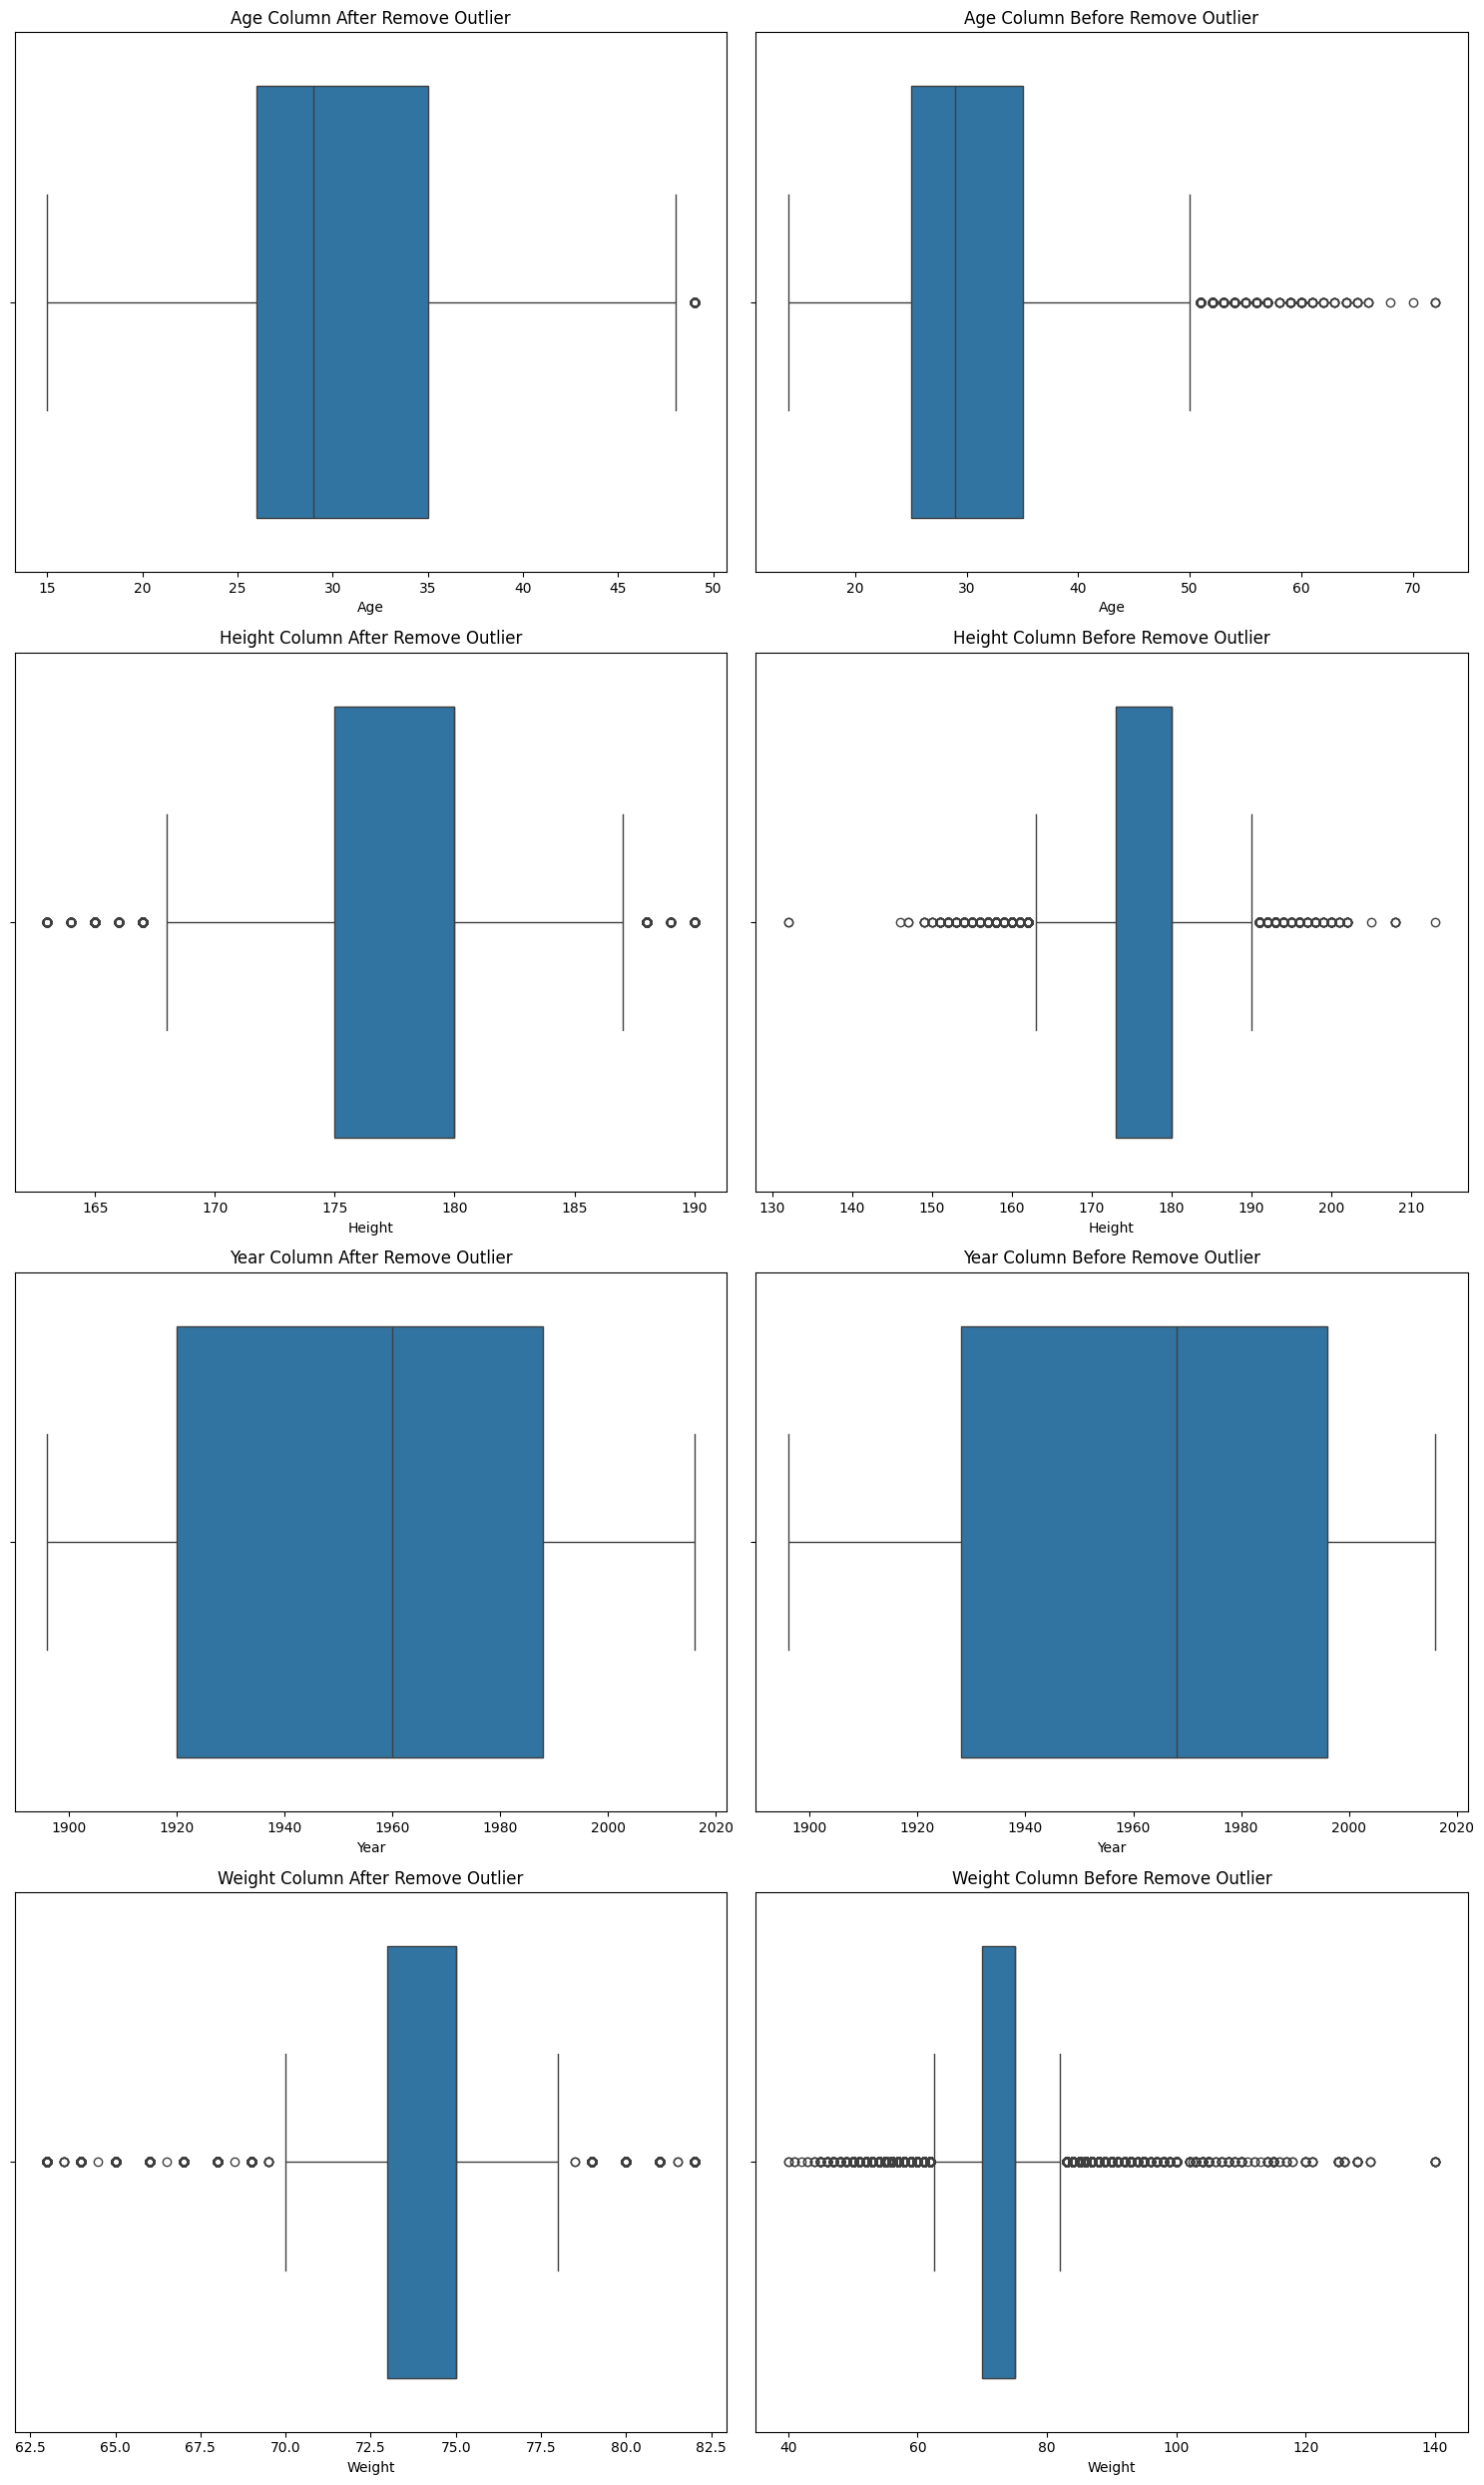

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.boxplot(x = df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.boxplot(x = df1['Age'],ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.boxplot(x = df['Height'], ax=axes[1, 0])
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.boxplot(x = df1['Height'],ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.boxplot(x = df['Year'] ,ax=axes[2, 0])
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.boxplot(x = df1['Year'], ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.boxplot(x = df['Weight'], ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.boxplot(x = df1['Weight'], ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\1638793607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\1638793607.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))


Text(0.5, 1.0, 'Sex Ratio According to Dataset')

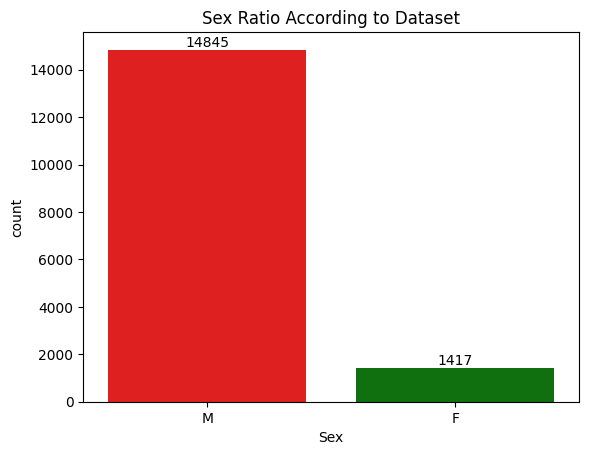

In [24]:
ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
plt.title('Sex Ratio According to Dataset')

In [25]:
def age_c(data):
    if 10<= data <=20:
        return '10-20'
    elif 21<= data <=30:
        return '21-30'
    elif 31<= data <=40:
        return '31 - 40'
df['Age_Group'] = df['Age'].apply(age_c)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\450057113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age'].apply(age_c)


In [26]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category,Age_Group
0,Lars Thorlaksn Aas,M,33.0,180.0,75.0,Norway,NOR,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",Individual or Pair Sports (Equipment-based),31 - 40
1,Lars Thorlaksn Aas,M,33.0,180.0,75.0,Norway,NOR,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Individual",Individual or Pair Sports (Equipment-based),31 - 40
2,Lars Thorlaksn Aas,M,33.0,180.0,75.0,Norway,NOR,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Team",Individual or Pair Sports (Equipment-based),31 - 40
3,Hakon Aasns,M,41.0,180.0,75.0,Norway,NOR,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",Individual or Pair Sports (Equipment-based),None
10,Giorgos Abalof,M,22.0,178.0,70.0,Greece,GRE,2004,Summer,Athina,Fencing,"Fencing Men's epee, Individual",Individual or Pair Sports (Equipment-based),21-30


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\2836699870.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ['10-20','21-30','31-40'])


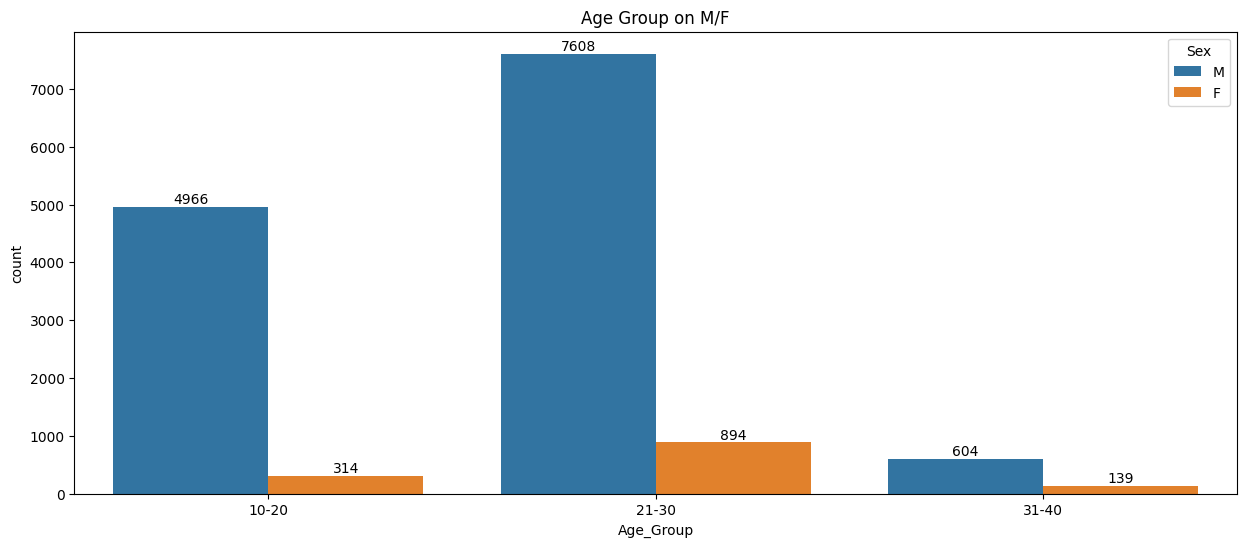

In [27]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = df['Age_Group'],hue = df['Sex'])
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_xticklabels(labels = ['10-20','21-30','31-40'])
plt.title('Age Group on M/F')
plt.show()

In [28]:
l = df['Sport'].unique()

l

array(['Fencing', 'Shooting', 'Golf'], dtype=object)

In [29]:
age_mean = round(df.groupby(['Sport','Sex'])['Age'].mean()).reset_index()
age_mean

,Sport,Sex,Age
0,Fencing,F,27.0
1,Fencing,M,29.0
2,Golf,F,28.0
3,Golf,M,30.0
4,Shooting,F,29.0
5,Shooting,M,33.0


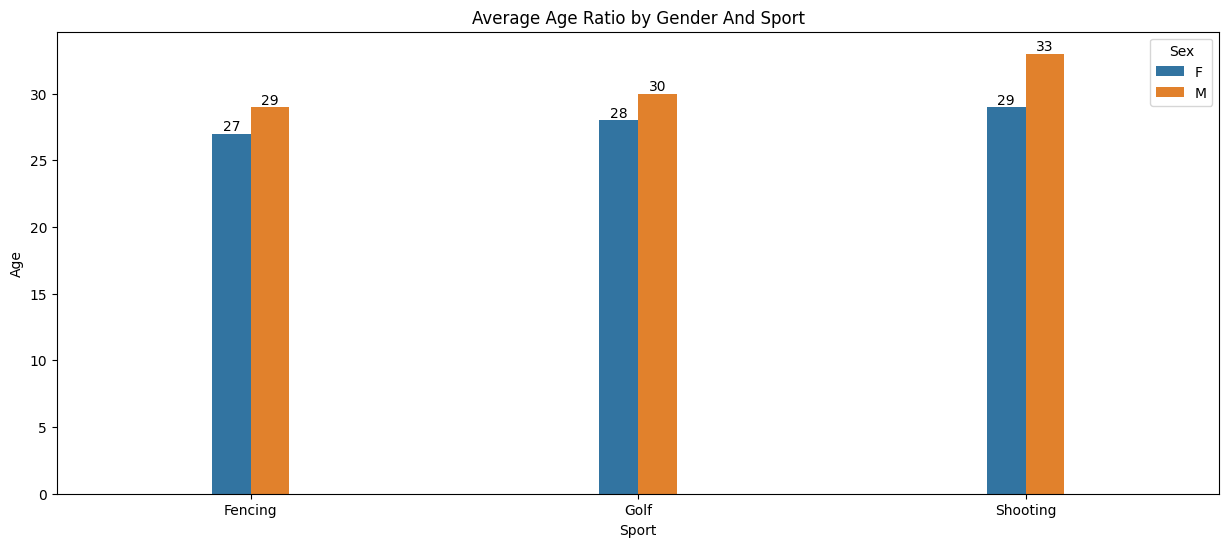

In [30]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x=age_mean['Sport'],y = age_mean['Age'],hue = age_mean['Sex'],width = 0.2)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Age Ratio by Gender And Sport')
plt.show()

In [31]:
wg_mean = round(df.groupby(['Sport','Sex'])['Weight'].mean()).reset_index()
wg_mean
hg_mean = round(df.groupby(['Sport','Sex'])['Height'].mean()).reset_index()
wg_mean

,Sport,Sex,Weight
0,Fencing,F,69.0
1,Fencing,M,74.0
2,Golf,F,70.0
3,Golf,M,75.0
4,Shooting,F,70.0
5,Shooting,M,74.0


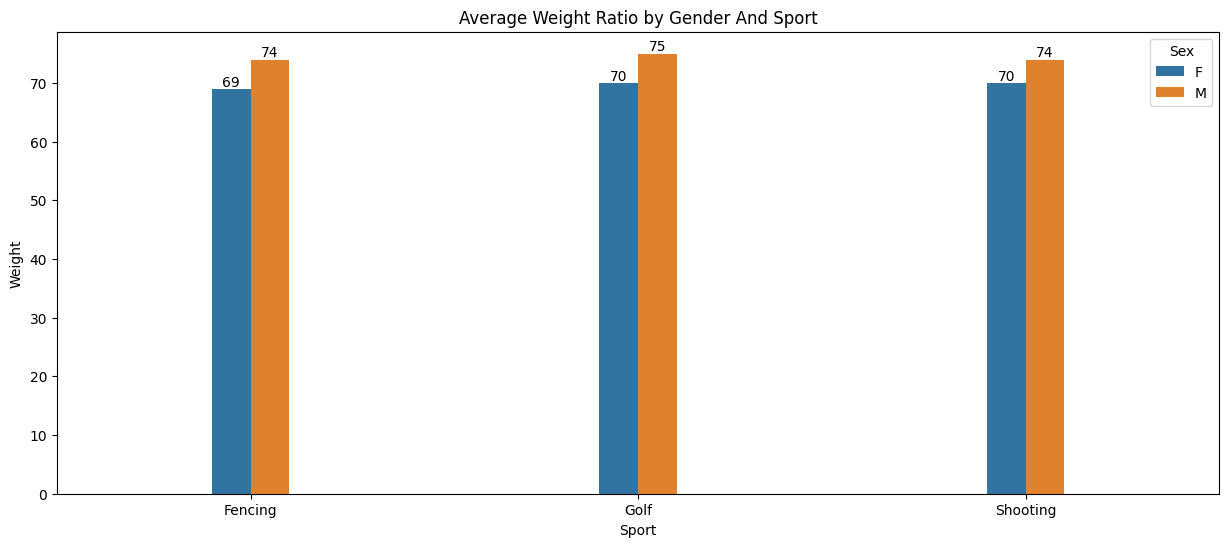

In [32]:
plt.figure(figsize = (15,6))

ax = sns.barplot(x=wg_mean['Sport'],y = wg_mean['Weight'],hue = wg_mean['Sex'],width = 0.2)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Weight Ratio by Gender And Sport')
plt.show()

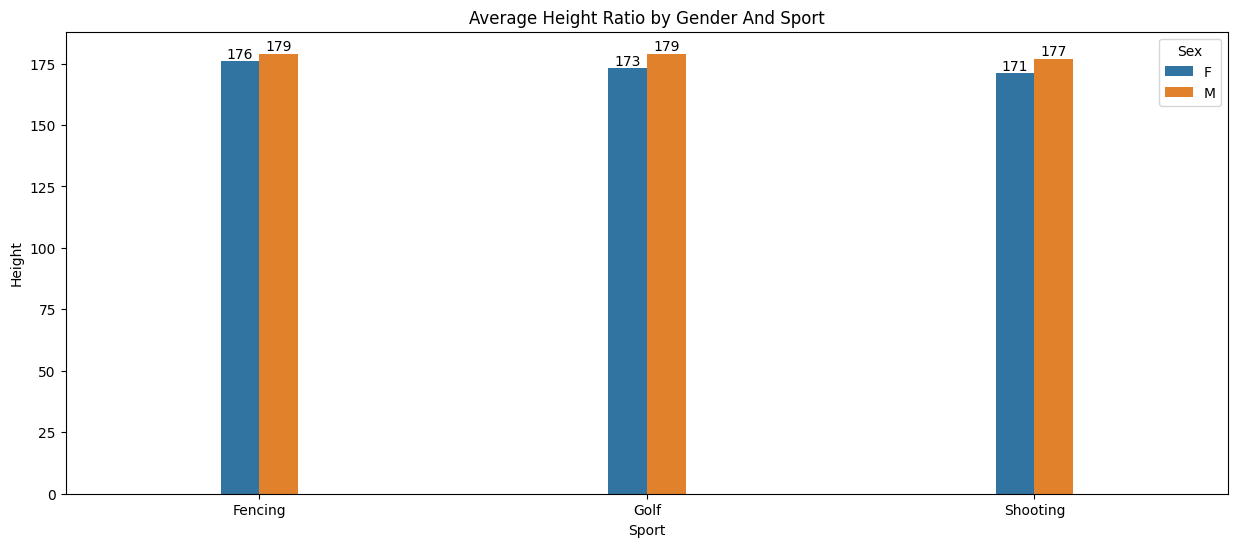

In [33]:
plt.figure(figsize = (15,6))

ax = sns.barplot(x=hg_mean['Sport'],y = hg_mean['Height'],hue = hg_mean['Sex'],width = 0.2)
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Height Ratio by Gender And Sport')
plt.show()

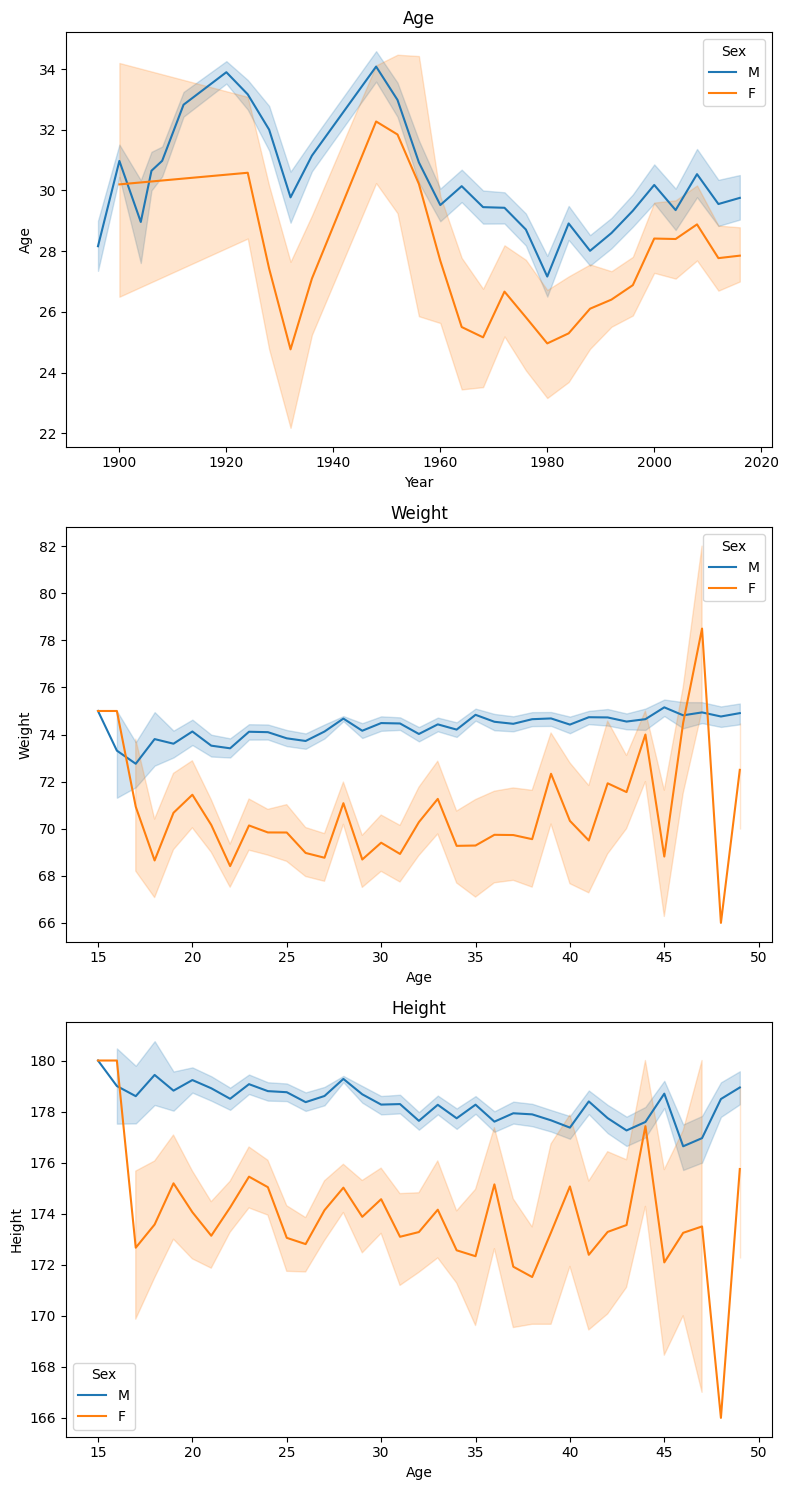

In [34]:
plt.figure(figsize = (8,15))
plt.subplot(3,1,1)
ax = sns.lineplot(x = df['Year'],y = df['Age'],hue = df['Sex'])
ax.set_title('Age')
plt.subplot(3,1,2)
ax = sns.lineplot(y = df['Weight'],x = df['Age'],hue = df['Sex'])
ax.set_title('Weight')
plt.subplot(3,1,3)
ax = sns.lineplot(y = df['Height'],x = df['Age'],hue = df['Sex'])
ax.set_title('Height')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\6287823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\6287823.py:3: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))


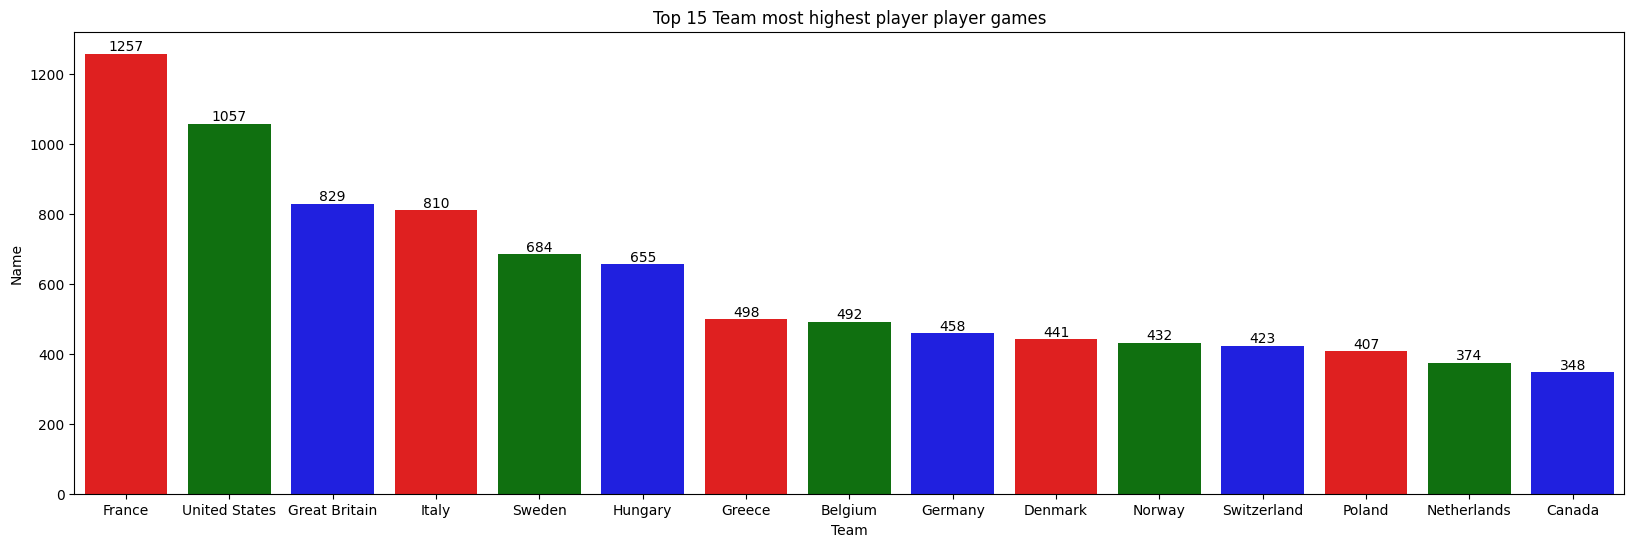

In [35]:
plt.figure(figsize = (20,6))
team_p =   df.groupby(['Team'])['Name'].count().reset_index().sort_values(by = 'Name',ascending = False).head(15)
ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
for i in range(team_p.Name.nunique()):
    ax.bar_label(ax.containers[i])
plt.title('Top 15 Team most highest player player games')
plt.show()

<Axes: xlabel='Year', ylabel='Name'>

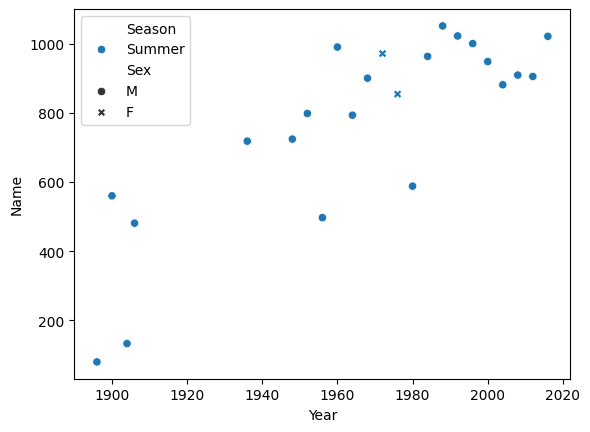

In [36]:
d = df1.groupby(['Year','Season'])['Name'].count().reset_index()
sns.scatterplot(x =d['Year'],y = d['Name'],hue = d['Season'],style = df['Sex'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\1142414833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x  = team_p['Sport'],y = team_p['Name'],palette = list('rgb'),width = 0.2)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6836\1142414833.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(x  = team_p['Sport'],y = team_p['Name'],palette = list('rgb'),width = 0.2)


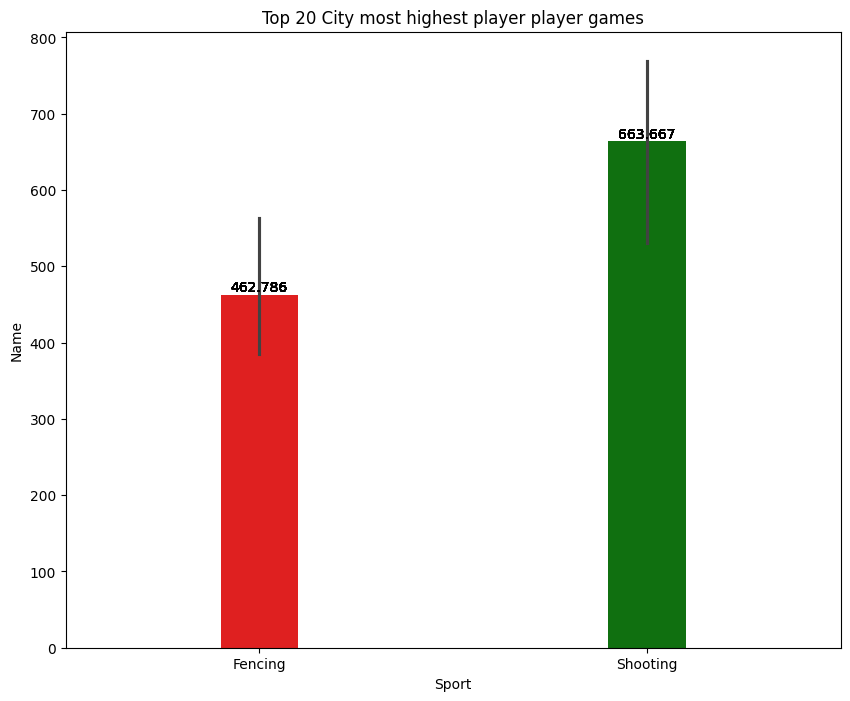

In [49]:
team_p = df.groupby(['City',"Sport"])['Name'].count().reset_index().sort_values(by = 'Name',ascending = False).head(20)
plt.figure(figsize = (10,8))
ax = sns.barplot(x  = team_p['Sport'],y = team_p['Name'],palette = list('rgb'),width = 0.2)
for i in range(team_p.Name.nunique()):
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[0])
plt.title('Top 20 City most highest player player games')
plt.show()

In [50]:
team_p

,City,Sport,Name
15,London,Fencing,914
16,London,Shooting,835
2,Antwerpen,Shooting,783
42,Stockholm,Shooting,729
29,Paris,Fencing,728
31,Paris,Shooting,684
4,Athina,Shooting,597
11,Berlin,Fencing,546
17,Los Angeles,Fencing,497
13,Helsinki,Fencing,479
